In [7]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_parquet("/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/MAY24_BDS_INT_Fire_Brigade/data/df_cleaned_for_model.parquet")
df.head() 

,IncidentGroup_Fire,IncidentGroup_Special Service,AggregatedPropertyCategory_Outdoor,AggregatedPropertyCategory_Residential,AggregatedPropertyCategory_Vehicle,CellEastingNorthing2500_502500-175000,CellEastingNorthing2500_502500-177500,CellEastingNorthing2500_502500-180000,CellEastingNorthing2500_502500-182500,CellEastingNorthing2500_502500-187500,CellEastingNorthing2500_502500-190000,CellEastingNorthing2500_502500-192500,CellEastingNorthing2500_505000-172500,CellEastingNorthing2500_505000-175000,CellEastingNorthing2500_505000-177500,CellEastingNorthing2500_505000-180000,CellEastingNorthing2500_505000-182500,CellEastingNorthing2500_505000-185000,CellEastingNorthing2500_505000-187500,CellEastingNorthing2500_505000-190000,CellEastingNorthing2500_507500-170000,CellEastingNorthing2500_507500-172500,CellEastingNorthing2500_507500-175000,CellEastingNorthing2500_507500-177500,CellEastingNorthing2500_507500-180000,CellEastingNorthing2500_507500-182500,CellEastingNorthing2500_507500-185000,CellEastingNorthing2500_507500-187500,CellEastingNorthing2500_507500-190000,CellEastingNorthing2500_510000-167500,CellEastingNorthing2500_510000-170000,CellEastingNorthing2500_510000-172500,CellEastingNorthing2500_510000-175000,CellEastingNorthing2500_510000-177500,CellEastingNorthing2500_510000-180000,CellEastingNorthing2500_510000-182500,CellEastingNorthing2500_510000-185000,CellEastingNorthing2500_510000-187500,CellEastingNorthing2500_510000-190000,CellEastingNorthing2500_512500-167500,CellEastingNorthing2500_512500-170000,CellEastingNorthing2500_512500-172500,CellEastingNorthing2500_512500-175000,CellEastingNorthing2500_512500-177500,CellEastingNorthing2500_512500-180000,CellEastingNorthing2500_512500-182500,CellEastingNorthing2500_512500-185000,CellEastingNorthing2500_512500-187500,CellEastingNorthing2500_512500-190000,CellEastingNorthing2500_512500-192500,CellEastingNorthing2500_515000-157500,CellEastingNorthing2500_515000-160000,CellEastingNorthing2500_515000-162500,CellEastingNorthing2500_515000-165000,CellEastingNorthing2500_515000-167500,CellEastingNorthing2500_515000-170000,CellEastingNorthing2500_515000-172500,CellEastingNorthing2500_515000-175000,CellEastingNorthing2500_515000-177500,CellEastingNorthing2500_515000-180000,CellEastingNorthing2500_515000-182500,CellEastingNorthing2500_515000-185000,CellEastingNorthing2500_515000-187500,CellEastingNorthing2500_515000-190000,CellEastingNorthing2500_515000-192500,CellEastingNorthing2500_517500-160000,CellEastingNorthing2500_517500-162500,CellEastingNorthing2500_517500-165000,CellEastingNorthing2500_517500-167500,CellEastingNorthing2500_517500-170000,CellEastingNorthing2500_517500-172500,CellEastingNorthing2500_517500-175000,CellEastingNorthing2500_517500-177500,CellEastingNorthing2500_517500-180000,CellEastingNorthing2500_517500-182500,CellEastingNorthing2500_517500-185000,CellEastingNorthing2500_517500-187500,CellEastingNorthing2500_517500-190000,CellEastingNorthing2500_517500-192500,CellEastingNorthing2500_517500-195000,CellEastingNorthing2500_520000-162500,CellEastingNorthing2500_520000-165000,CellEastingNorthing2500_520000-167500,CellEastingNorthing2500_520000-170000,CellEastingNorthing2500_520000-172500,CellEastingNorthing2500_520000-175000,CellEastingNorthing2500_520000-177500,CellEastingNorthing2500_520000-180000,CellEastingNorthing2500_520000-182500,CellEastingNorthing2500_520000-185000,CellEastingNorthing2500_520000-187500,CellEastingNorthing2500_520000-190000,CellEastingNorthing2500_520000-192500,CellEastingNorthing2500_520000-195000,CellEastingNorthing2500_522500-160000,CellEastingNorthing2500_522500-162500,CellEastingNorthing2500_522500-165000,CellEastingNorthing2500_522500-167500,CellEastingNorthing2500_522500-170000,CellEastingNorthing2500_522500-172500,CellEastingNorthing2500_522500-175000,CellEastingNorthing2500_522500-177500,CellEastingNorthing2500_522500-180000,CellEastingNorthing2500_522500-182500,CellEastingNorthing2500_522500-185000,CellEastingNorthing2500_522500-187500,Cel

In [4]:
df.columns

Index(['IncidentGroup_Fire', 'IncidentGroup_Special Service',
       'AggregatedPropertyCategory_Outdoor',
       'AggregatedPropertyCategory_Residential',
       'AggregatedPropertyCategory_Vehicle',
       'CellEastingNorthing2500_502500-175000',
       'CellEastingNorthing2500_502500-177500',
       'CellEastingNorthing2500_502500-180000',
       'CellEastingNorthing2500_502500-182500',
       'CellEastingNorthing2500_502500-187500',
       ...
       'IsBankholiday', 'IsWeekend', 'DistanceStationLog',
       'TotalResponseTimeLog', 'Hour_sin', 'Hour_cos', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos'],
      dtype='object', length=320)

# Model Training

In [5]:
X = df.drop("TotalResponseTimeLog", axis = 1)
y = df["TotalResponseTimeLog"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)


In [8]:
l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99)
alphas =(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
cv = 10

model_elnet = ElasticNetCV(l1_ratio=l1_ratio, alphas = alphas, cv = cv)


In [10]:
model_elnet.fit(X_train, y_train)


ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             cv=10, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99))

In [12]:
alphas = model_elnet.alphas_


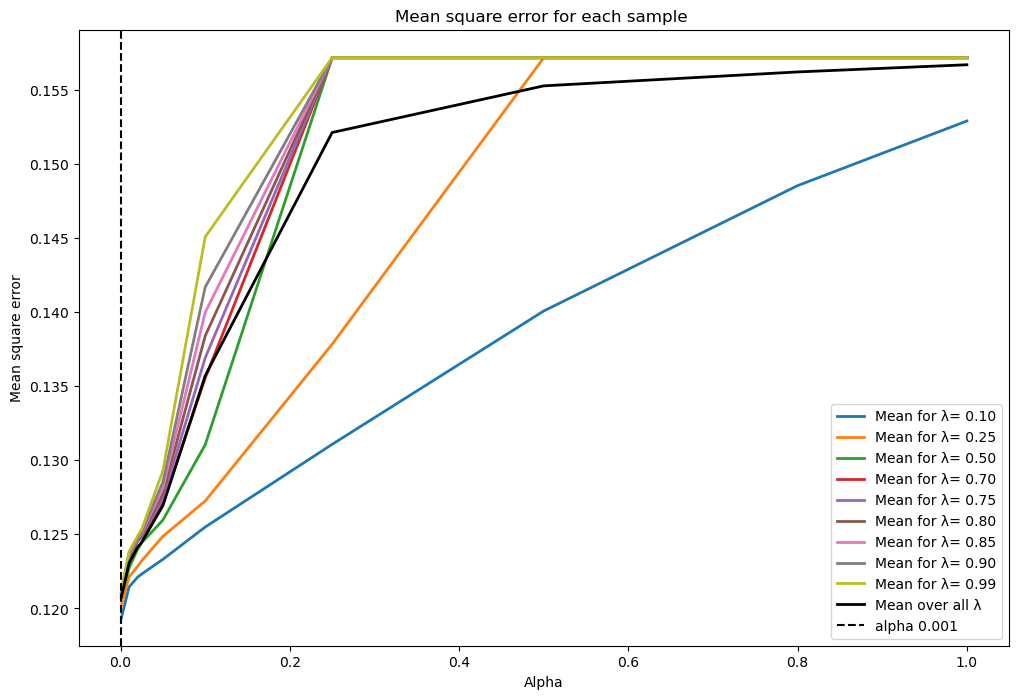

In [13]:
plt.figure(figsize=(12, 8))
for i in range(model_elnet.mse_path_.shape[0]) :
    plt.plot(alphas, model_elnet.mse_path_[i,:,:].mean(axis=1),
         label='Mean for λ= %.2f' %model_elnet.l1_ratio[i], linewidth=2)

plt.plot(alphas, model_elnet.mse_path_.mean(axis=0).mean(axis=1), 'k',
         label='Mean over all λ', linewidth=2)

plt.axvline(model_elnet.alpha_, linestyle='--', color='k',
            label='alpha ' f'{model_elnet.alpha_}')

plt.legend()

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error for each sample ')
plt.show()

In [18]:
# Display the best parameters
print(f"Best alpha: {model_elnet.alpha_}")
print(f"Best l1_ratio: {model_elnet.l1_ratio_}")


Best alpha: 0.001
Best l1_ratio: 0.1


# Model Prediction & Evaluatin

In [16]:
y_pred_train = model_elnet.predict(X_train)


In [17]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {rmse_train}")
print(f"Train MSE: {mse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train R²: {r2_train}")

Train RMSE: 0.34547662069524876
Train MSE: 0.1193540954470088
Train MAE: 0.25533744097237526
Train R²: 0.24052524200604553


In [14]:
y_pred = model_elnet.predict(X_test)


In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 0.3449476696175091
MSE: 0.11898889477455021
MAE: 0.25545761314687493
R²: 0.24175655092793624
